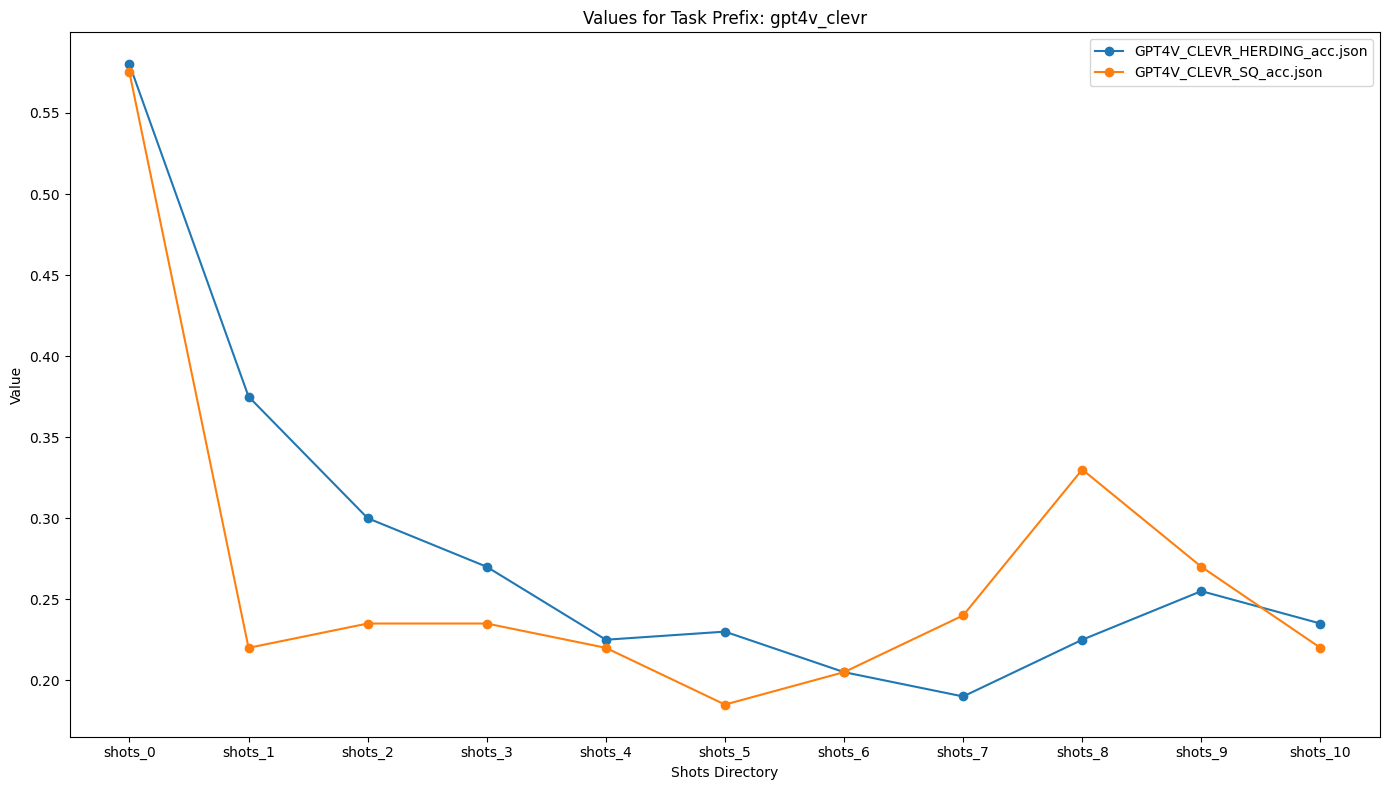

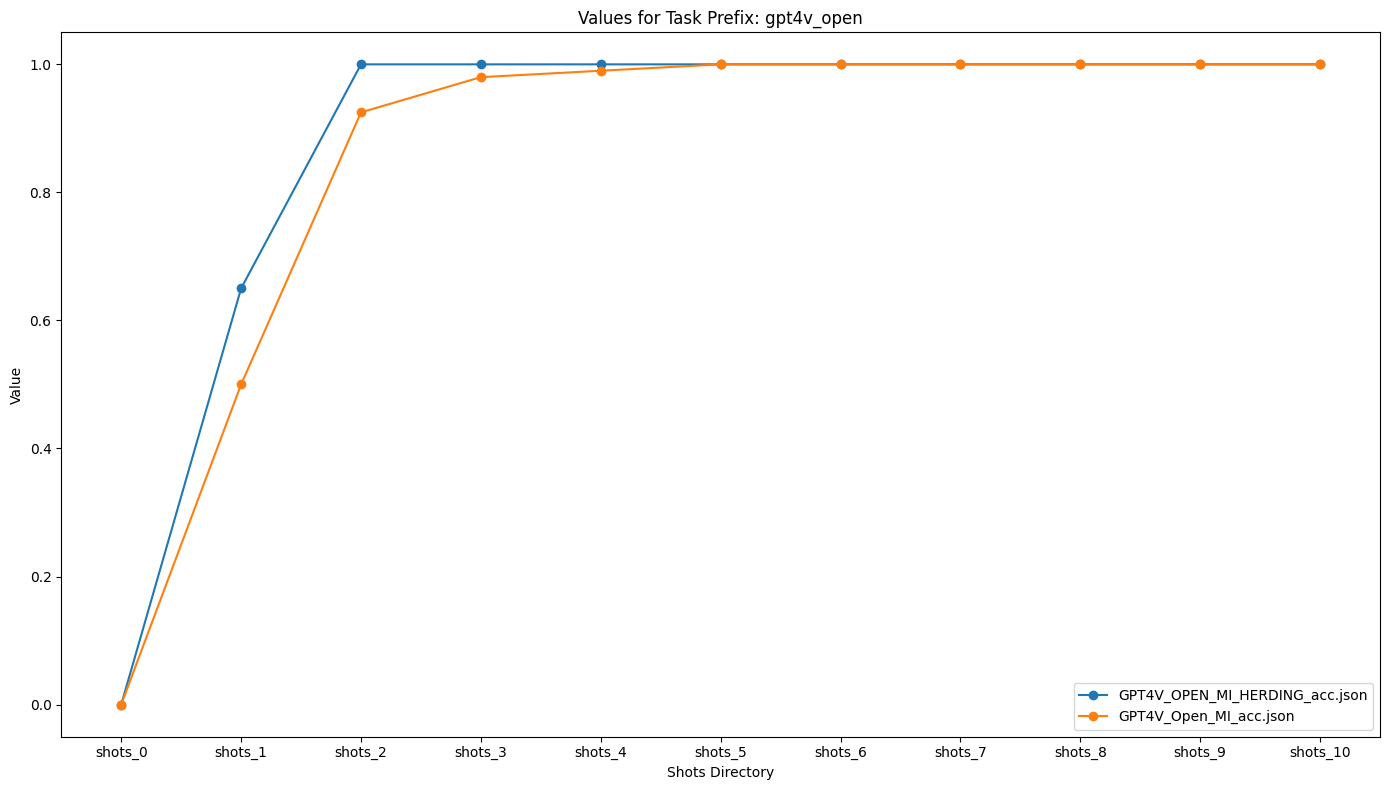

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# 根目录路径
root_dir = "/home/zxy/codes/working/ICLBoom/VLMEvalKit/outputs/GPT4V"

# 初始化数据字典
data = defaultdict(dict)

# 获取并排序shots目录
shots_dirs = sorted(
    [d for d in os.listdir(root_dir) if d.startswith("shots_")],
    key=lambda x: int(x.split("_")[1]),
)

# 遍历每个shots目录
for shots_dir in shots_dirs:
    shots_path = os.path.join(root_dir, shots_dir)
    if os.path.isdir(shots_path):
        # 遍历每个JSON文件
        for file_name in os.listdir(shots_path):
            if file_name.endswith(".json"):
                file_path = os.path.join(shots_path, file_name)
                with open(file_path, "r") as f:
                    value = json.load(f)
                    # 假设JSON文件中只有一个值
                    data[shots_dir][file_name] = value

# 获取所有任务前缀（不区分大小写）
task_prefixes = defaultdict(lambda: defaultdict(list))
for shots_dir, files in data.items():
    for file_name in files.keys():
        prefix = "_".join(file_name.split("_")[:2]).lower()
        task_prefixes[prefix][file_name].append(
            (shots_dir, data[shots_dir][file_name])
        )

# 可视化数据
for prefix, sub_tasks in task_prefixes.items():
    plt.figure(figsize=(14, 8))
    plt.title(f"Values for Task Prefix: {prefix}")
    plt.xlabel("Shots Directory")
    plt.ylabel("Value")

    for sub_task, values in sub_tasks.items():
        shots_dirs_with_task = [shots_dir for shots_dir, _ in values]
        values = [value for _, value in values]
        plt.plot(shots_dirs_with_task, values, marker="o", label=sub_task)

    plt.legend()
    plt.tight_layout()
    plt.show()